# Linear Regression (OLS) Implemented using `statsmodels`

**Notebook Contents:**
* [EDA](#scrollTo=j0S-JlW6Igz1)
* [Data Processing](#scrollTo=rggRpBu6Pfgs)
* [Outlier Analysis](#scrollTo=GMPXFkEu8jLh)
* [Model Fitting](#scrollTo=8yKCsbr1H5c7)
* [OLS Model Output](#scrollTo=FQeAix8rhS3A)
* [Model Output Interpretation](#scrollTo=8F6CscUeh8te)
* [OLS Model Assumptions](#scrollTo=2-nGQ_qA6jVE)
* [Assumption Diagnostics](#scrollTo=dP-XWOxF-lSY)
* [Model Evaluation & Cross Validation](#scrollTo=TcWKEbFoe9JB)
* [Model Comparison](#scrollTo=GGqc4DDRl2SS)
* [Categorical Feature](#scrollTo=OfTavk17--BT)
* [Assessing Coefficient Variability](#scrollTo=izSlyA8UrWvO&line=7&uniqifier=1)
* [Prediction Confidence Intervals](#scrollTo=bnO5NTO8cIij)
* [Linear Regression: Feature Scaling (MinMax)](#scrollTo=V9lH8ZX_GHTc&line=2&uniqifier=1)
* [Linear Regression: Feature Scaling (StandardScaler)](#scrollTo=bol7if8IWcG1&line=13&uniqifier=1)
* [Effect Plots](#scrollTo=iqg1RGVnhe68&line=1&uniqifier=1)
* [Local Interpretability](#scrollTo=RlEC5Kh3i8F5&line=1&uniqifier=1)
[Feature Selection with Lasso Regularization](#scrollTo=MdjJVTEOl2ZU&line=1&uniqifier=1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Connect to Google Drive Locally

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/Colab/Machine Learning/statsmodels/data/Uber-ETA/train.csv'
test_path = '/content/drive/MyDrive/Colab/Machine Learning/statsmodels/data/Uber-ETA/test.csv'
weather_path = '/content/drive/MyDrive/Colab/Machine Learning/statsmodels/data/Uber-ETA/weather.csv'

# train_path = '/data/Uber-ETA/train.csv'
# test_path = '/data/Uber-ETA/test.csv'
# weather_path = '/data/Uber-ETA/weather.csv'

In [ ]:
df = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
df_weather = pd.read_csv(weather_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83924 entries, 0 to 83923
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               83924 non-null  object 
 1   Timestamp        83924 non-null  object 
 2   Origin_lat       83924 non-null  float64
 3   Origin_lon       83924 non-null  float64
 4   Destination_lat  83924 non-null  float64
 5   Destination_lon  83924 non-null  float64
 6   Trip_distance    83924 non-null  int64  
 7   ETA              83924 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.1+ MB


In [ ]:
df.head()

ID             Timestamp  Origin_lat  Origin_lon  Destination_lat  \
0  000FLWA8  2019-12-04T20:01:50Z       3.258      36.777            3.003   
1  000RGOAM  2019-12-10T22:37:09Z       3.087      36.707            3.081   
2  001QSGIH  2019-11-23T20:36:10Z       3.144      36.739            3.088   
3  002ACV6R  2019-12-01T05:43:21Z       3.239      36.784            3.054   
4  0039Y7A8  2019-12-17T20:30:20Z       2.912      36.707            3.207   

   Destination_lon  Trip_distance   ETA  
0           36.718          39627  2784  
1           36.727           3918   576  
2           36.742           7265   526  
3           36.763          23350  3130  
4           36.698          36613  2138

In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        61 non-null     object 
 1   dewpoint_2m_temperature     61 non-null     float64
 2   maximum_2m_air_temperature  61 non-null     float64
 3   mean_2m_air_temperature     61 non-null     float64
 4   mean_sea_level_pressure     61 non-null     float64
 5   minimum_2m_air_temperature  61 non-null     float64
 6   surface_pressure            61 non-null     float64
 7   total_precipitation         61 non-null     float64
 8   u_component_of_wind_10m     61 non-null     float64
 9   v_component_of_wind_10m     61 non-null     float64
dtypes: float64(9), object(1)
memory usage: 4.9+ KB


In [ ]:
df_weather.head()

date  dewpoint_2m_temperature  maximum_2m_air_temperature  \
0  2019-11-01               290.630524                  296.434662   
1  2019-11-02               289.135284                  298.432404   
2  2019-11-03               287.667694                  296.612122   
3  2019-11-04               287.634644                  297.173737   
4  2019-11-05               286.413788                  294.284851   

   mean_2m_air_temperature  mean_sea_level_pressure  \
0               294.125061            101853.617188   
1               295.551666            101225.164062   
2               295.182831            100806.617188   
3               294.368134            101240.929688   
4               292.496979            101131.750000   

   minimum_2m_air_temperature  surface_pressure  total_precipitation  \
0                  292.503998     100806.351562             0.004297   
1                  293.337921     100187.250000             0.001767   
2                  293.674316      99771.414062             0.000797   
3                  292.376221     100200.843750             0.000393   
4                  289.143066     100088.500000             0.004658   

   u_component_of_wind_10m  v_component_of_wind_10m  
0                 3.561323                 0.941695  
1                 5.318593                 3.258237  
2                 8.447649                 3.172982  
3                 5.991428                 2.236700  
4                 6.962730                 2.655364

# EDA

In [ ]:
# perc = np.arange(0.05, 1, 0.05)
df['Trip_distance'].describe()

count    83924.000000
mean     13527.821410
std       9296.716006
min          1.000000
25%       6108.000000
50%      11731.500000
75%      19369.000000
max      62028.000000
Name: Trip_distance, dtype: float64

Text(37.722222222222214, 0.5, 'Trip Distance')

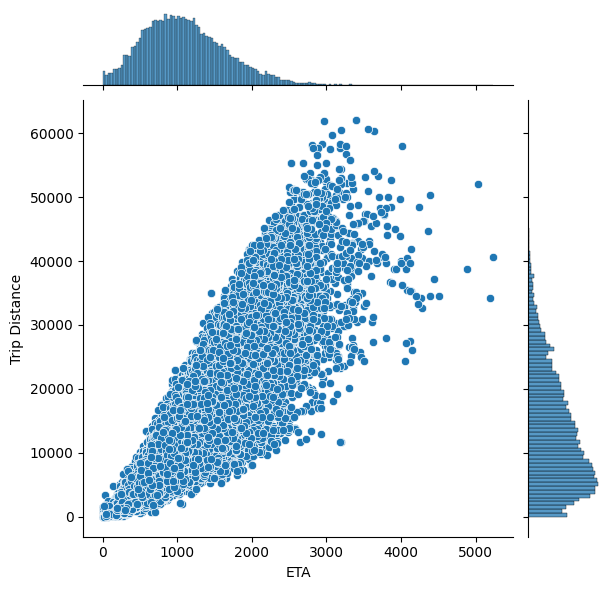

In [ ]:
sns.jointplot(data=df, x="ETA", y="Trip_distance")
# plt.title('Joint Plot: ETA & Trip Distance')
plt.xlabel('ETA')
plt.ylabel('Trip Distance')

# Data Preprocessing

In [ ]:
# create time features df_train
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['date'] = df['Timestamp'].dt.date
df['date'] = pd.to_datetime(df['date']).dt.normalize()
df['dayofweek'] = df['Timestamp'].dt.day_name()
df['hour'] = df['Timestamp'].dt.hour

# # create time features df_test
df_weather['date'] = pd.to_datetime(df_weather['date'])
df_weather['date'] = pd.to_datetime(df_weather['date']).dt.normalize()

#########################################################################################################

# create time features df_test
df_test['Timestamp'] = pd.to_datetime(df_test['Timestamp'])
df_test['date'] = df_test['Timestamp'].dt.date
df_test['date'] = pd.to_datetime(df_test['date']).dt.normalize()
df_test['dayofweek'] = df_test['Timestamp'].dt.day_name()
df_test['hour'] = df_test['Timestamp'].dt.hour

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83924 entries, 0 to 83923
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   ID               83924 non-null  object             
 1   Timestamp        83924 non-null  datetime64[ns, UTC]
 2   Origin_lat       83924 non-null  float64            
 3   Origin_lon       83924 non-null  float64            
 4   Destination_lat  83924 non-null  float64            
 5   Destination_lon  83924 non-null  float64            
 6   Trip_distance    83924 non-null  int64              
 7   ETA              83924 non-null  int64              
 8   date             83924 non-null  datetime64[ns]     
 9   dayofweek        83924 non-null  object             
 10  hour             83924 non-null  int32              
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(4), int32(1), int64(2), object(2)
memory usage: 6.7+ MB


In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        61 non-null     datetime64[ns]
 1   dewpoint_2m_temperature     61 non-null     float64       
 2   maximum_2m_air_temperature  61 non-null     float64       
 3   mean_2m_air_temperature     61 non-null     float64       
 4   mean_sea_level_pressure     61 non-null     float64       
 5   minimum_2m_air_temperature  61 non-null     float64       
 6   surface_pressure            61 non-null     float64       
 7   total_precipitation         61 non-null     float64       
 8   u_component_of_wind_10m     61 non-null     float64       
 9   v_component_of_wind_10m     61 non-null     float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 4.9 KB


In [ ]:
# join weather data
df = df.merge(df_weather, on='date', how='left')

In [ ]:
cols = [
       'Origin_lat', 'Origin_lon', 'Destination_lat',
       'Destination_lon', 'Trip_distance', 'dayofweek',
       'dewpoint_2m_temperature', 'maximum_2m_air_temperature',
       'mean_2m_air_temperature', 'mean_sea_level_pressure',
       'minimum_2m_air_temperature', 'surface_pressure', 'total_precipitation',
       'u_component_of_wind_10m', 'v_component_of_wind_10m', 'ETA'
       ]

df_uber = df[cols]

df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83924 entries, 0 to 83923
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Origin_lat                  83924 non-null  float64
 1   Origin_lon                  83924 non-null  float64
 2   Destination_lat             83924 non-null  float64
 3   Destination_lon             83924 non-null  float64
 4   Trip_distance               83924 non-null  int64  
 5   dayofweek                   83924 non-null  object 
 6   dewpoint_2m_temperature     83924 non-null  float64
 7   maximum_2m_air_temperature  83924 non-null  float64
 8   mean_2m_air_temperature     83924 non-null  float64
 9   mean_sea_level_pressure     83924 non-null  float64
 10  minimum_2m_air_temperature  83924 non-null  float64
 11  surface_pressure            83924 non-null  float64
 12  total_precipitation         83924 non-null  float64
 13  u_component_of_wind_10m     839

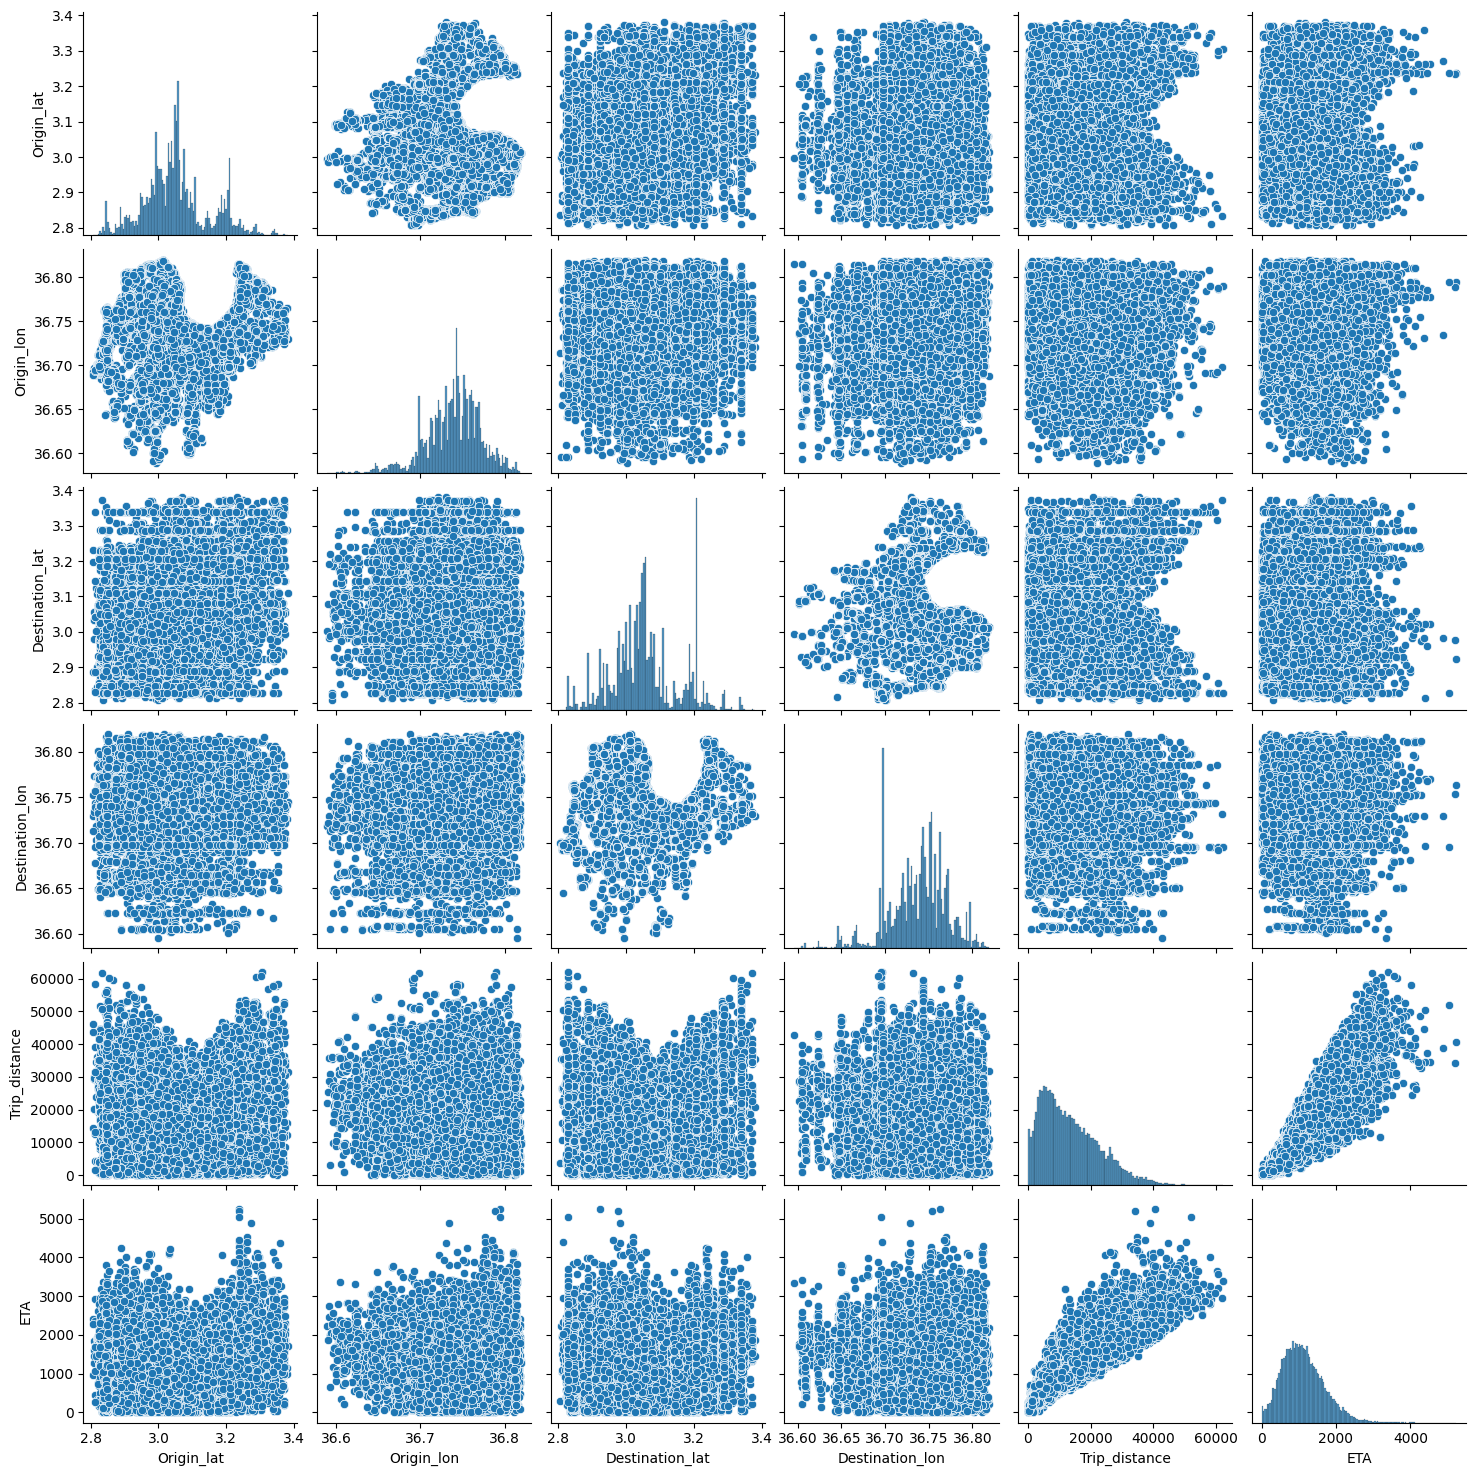

In [ ]:
cols = ['Origin_lat', 'Origin_lon', 'Destination_lat', 'Destination_lon', 'Trip_distance', 'ETA']
sns.pairplot(df_uber[cols])

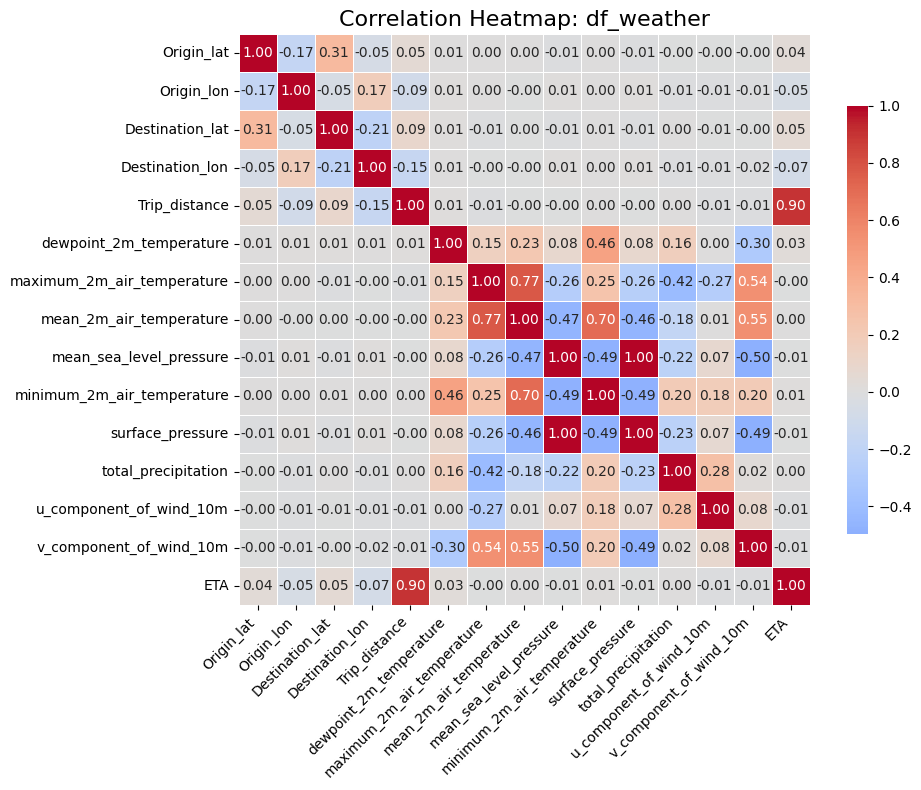

In [ ]:
  # correlation matrix
  corr_matrix = df_uber.corr(numeric_only=True)  # Use numeric_only=True for pandas >=1.5

  # Plot heatmap
  plt.figure(figsize=(10, 8))
  sns.heatmap(
      corr_matrix,
      annot=True,       # Show correlation coefficients
      cmap='coolwarm',  # Color map
      center=0,         # Center the colormap at zero
      fmt=".2f",        # Format the numbers to 2 decimal places
      square=True,      # Make cells square
      linewidths=0.5,   # Cell border lines
      cbar_kws={"shrink": 0.75}  # Shrink color bar
  )
  plt.title("Correlation Heatmap: df_weather", fontsize=16)
  plt.xticks(rotation=45, ha='right')
  plt.yticks(rotation=0)
  plt.tight_layout()
  plt.show()

/tmp/ipython-input-444951493.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_uber[feature], y=df[target], palette="Blues")


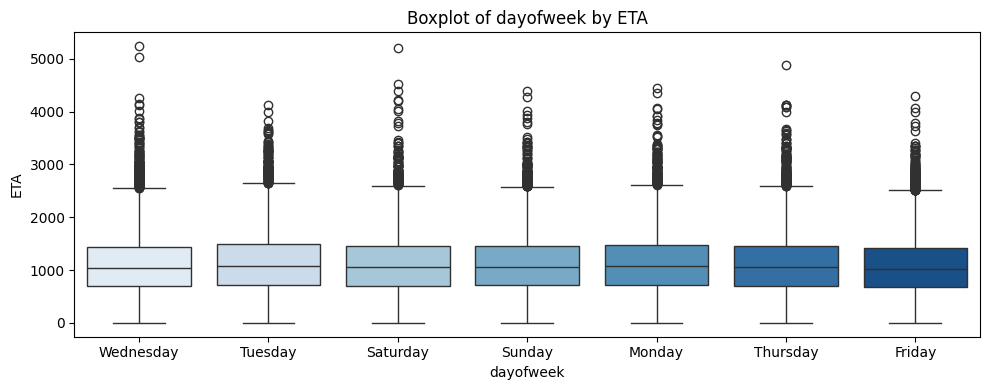

In [ ]:
# EDA of categorical variable and target

feature = 'dayofweek'
target = 'ETA'

plt.figure(figsize=(10, 4))
sns.boxplot(x=df_uber[feature], y=df[target], palette="Blues")
plt.title(f"Boxplot of {feature} by {target}")
plt.xlabel(feature)
plt.ylabel(target)
plt.tight_layout()
plt.show()

# Outlier Analysis

In [ ]:
# identify outliers using IQR method
def flag_outliers_iqr(df, column):
    """
    Adds a binary flag column to the dataframe indicating outliers using the IQR method.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        column (str): The name of the column to evaluate.

    Returns:
        pd.DataFrame: The dataframe with a new binary outlier column added.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_col = f'{column}_outlier_flag'
    df[outlier_col] = ((df[column] < lower_bound) | (df[column] > upper_bound)).astype(int)

    return df

In [ ]:
# Trip_distance outliers
df_uber_outlier = flag_outliers_iqr(df_uber, 'Trip_distance')
df_uber_outlier[['Trip_distance', 'Trip_distance_outlier_flag']]

df_uber_outlier['Trip_distance_outlier_flag'].value_counts()

/tmp/ipython-input-2049287231.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[outlier_col] = ((df[column] < lower_bound) | (df[column] > upper_bound)).astype(int)


Trip_distance_outlier_flag
0    82975
1      949
Name: count, dtype: int64

# Linear Regression

In [ ]:
model_cols = [
#  'Origin_lat',
#  'Origin_lon',
#  'Destination_lat',
#  'Destination_lon',
 'Trip_distance'
 ]

x = df_uber[model_cols]
y = df_uber['ETA']

In [ ]:
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()    #fit will apply a specific estimate technique (here,OLS) to obtain the fit of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ETA   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                 3.495e+05
Date:                Thu, 23 Oct 2025   Prob (F-statistic):               0.00
Time:                        23:52:09   Log-Likelihood:            -5.8179e+05
No. Observations:               83924   AIC:                         1.164e+06
Df Residuals:                   83922   BIC:                         1.164e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           375.3120      1.511    248.306

---

# OLS Model Output

| Output Element         | Description                                                                 | Interpretation Notes                                              | Access in `statsmodels`              |
|------------------------|-----------------------------------------------------------------------------|------------------------------------------------------------------|--------------------------------------|
| `Dep. Variable`        | The target variable being predicted                                          | —                                                                | `model.model.endog_names`           |
| `Model`                | The type of model used (`OLS`)                                              | Ordinary Least Squares regression                               | `type(model.model).__name__`        |
| `Method`               | Estimation method used (e.g., Least Squares)                                | —                                                                | `"Least Squares"` (fixed for OLS)   |
| `No. Observations`     | Total number of data points used                                            | Should match expected row count                                 | `model.nobs`                         |
| `Df Residuals`         | Degrees of freedom: $n - p$                                                 | Residual degrees of freedom                                     | `model.df_resid`                    |
| `Df Model`             | Number of estimated predictors                                               | Excludes intercept                                               | `model.df_model`                    |
| `Covariance Type`      | Type of standard error estimation                                           | Default is `nonrobust`; others include `HC0`, `HC1`, etc.       | `model.cov_type`                    |
| `R-squared`            | Proportion of variance in `y` explained by the model                        | Example: `0.85` → model explains 85% of variation                | `model.rsquared`                    |
| `Adj. R-squared`       | Adjusted R² accounts for number of predictors                               | Penalizes for overfitting                                        | `model.rsquared_adj`               |
| `F-statistic`          | Overall model significance: tests if all $\beta_i = 0$                      | Large value → likely at least one predictor is useful           | `model.fvalue`                      |
| `Prob (F-statistic)`   | p-value for the F-test                                                      | Example: `0.000` → reject null (model is significant)           | `model.f_pvalue`                   |
| `Log-Likelihood`       | Log of the model likelihood                                                 | Higher is better                                                 | `model.llf`                         |
| `AIC`                  | Akaike Information Criterion                                                | Lower = better for model selection                              | `model.aic`                         |
| `BIC`                  | Bayesian Information Criterion                                              | More conservative than AIC                                      | `model.bic`                         |
| `coef`                 | Estimated regression coefficient $\hat{\\beta}$                             | Direction + effect size of predictor                            | `model.params`                      |
| `std err`              | Standard error of the coefficient                                           | Precision of estimate                                           | `model.bse`                         |
| `t`                    | t-statistic                                                                 | Coef ÷ std err                                                  | `model.tvalues`                     |
| `P>|t|`                | p-value for coefficient significance                                        | Example: `<0.05` → significant predictor                        | `model.pvalues`                     |
| `[0.025, 0.975]`       | 95% confidence interval for the coefficient                                 | If 0 not in range → significant effect                          | `model.conf_int()`                  |
| `Omnibus`              | Omnibus test for residual normality                                         | Large value = non-normal residuals                              | `from scipy.stats import normaltest; normaltest(model.resid)` |
| `Prob(Omnibus)`        | p-value for Omnibus test                                                    | `< 0.05` → reject normality                                     | Same as above: index `[1]` of result |
| `Skew`, `Kurtosis`     | Shape of residual distribution                                              | Skew ≠ 0 or Kurtosis ≠ 3 → not normal                           | `from scipy.stats import skew, kurtosis; skew(model.resid), kurtosis(model.resid)` |
| `Durbin-Watson`        | Test for autocorrelation in residuals (0–4)                                | ≈2 = no autocorrelation                                         | `from statsmodels.stats.stattools import durbin_watson; durbin_watson(model.resid)` |
| `Jarque-Bera (JB)`     | JB test for normality of residuals                                          | High = non-normal residuals                                    | `from scipy.stats import jarque_bera; jarque_bera(model.resid)[0]` |
| `Prob(JB)`             | p-value for JB test                                                         | `< 0.05` → reject normality                                     | `jarque_bera(model.resid)[1]`       |
| `Cond. No.`            | Condition number (multicollinearity diagnostic)                            | >30 → possible multicollinearity                                | `np.linalg.cond(model.model.exog)` |

---

# Model Output Interpretation

* F-statistic tests the null hypothesis that all regression coefficients are equal to zero, meaning there is no relationship between the independent variables and the dependent variable in the population.

* F-statitistc P-value of 0.00 indicates that at least one predictor coefficient is non-zero (statistically)

* P-value of 'Trip_distance' of 0.00 is statistically significance

* Omnibus p-value of 0.000 indicates that the residuals are not normally distributed (OLS assumes residuals are normally distributed)

* Skew = 1.34, Kurtosis = 7.75; indicates the distribution of the residuals have right skew. Indicates target should be transformed using Box-Cox transformation

* Jarque-Bera test evaluates whether the residuals are normally distributed, value of 104066.054 and Prob(JB) of 0.00 indicates you can confidently reject the null hypothesis. The residuals are not normally distributed.
  * Indicates target variable should be transformed
  * It means standard errors, p-values, and confidence intervals may be invalid under the current model

* Durbin-Watson test of 2 indicates that there no autocorrelation of residuals

---

# OLS Assumptions

1. Linearity
2. Independence of Errors
3. Homoscedasticity (Constant Variance of Errors)
4. Normality of Errors
5. No Multicollinearity of Predictors

---

✅ 1. Linearity
The relationship between predictors and the target is linear in parameters.

🔍 How to Assess:
* Residual plots: Should show no clear pattern (i.e., residuals centered around 0)
* Partial regression plots: `from statsmodels.graphics.plot_partregress()`
* Scatterplots between each predictor and the target (EDA)

🔧 What to Do if Violated:
* Try transforming predictors (e.g., log, square root)
* Add polynomial terms or interactions
* Use non-linear models (e.g., decision trees or GAMs)

---

✅ 2. Independence of Errors
Residuals should be independent of each other (especially in time series).

🔍 How to Assess:
* Durbin-Watson test (≈2 is ideal)
* Residual vs. Time plots (look for autocorrelation)

🔧 What to Do if Violated:
* Use time-series models (e.g., ARIMA, GLS)
* Include lagged variables or autocorrelation terms
* Use robust standard errors if dependence is mild

---

✅ 3. Homoscedasticity (Constant Variance of Errors)
The spread of residuals should be roughly constant across all levels of the predictors.

🔍 How to Assess:
* Residuals vs. Fitted plot: Should not show a funnel shape
* Breusch-Pagan test or White test for heteroscedasticity

🔧 What to Do if Violated:
* Use log transformation of y or predictors
* Use Weighted Least Squares (WLS)
* Use robust standard errors (HC0, HC1, etc.)
---

✅ 4. Normality of Errors
Residuals should be normally distributed, mainly for valid hypothesis testing.

🔍 How to Assess:
* Q-Q Plot (statsmodels.api.qqplot)
* Histogram/KDE of residuals
* Jarque-Bera or Omnibus test

🔧 What to Do if Violated:
* Transform the target variable (e.g., log or Box-Cox)
* Trim or Winsorize outliers
* Use robust regression (RLM in statsmodels)
---

✅ 5. No Multicollinearity
Predictors should not be highly correlated with each other.

🔍 How to Assess:
* Correlation matrix
* Variance Inflation Factor (VIF) (> 5 or 10 is problematic)

🔧 What to Do if Violated:
* Remove or combine correlated predictors
* Use PCA or regularized regression (e.g., Ridge, Lasso)
* Use domain knowledge to drop redundant variables

# Assumption Diagnostics

## 1. Linearity

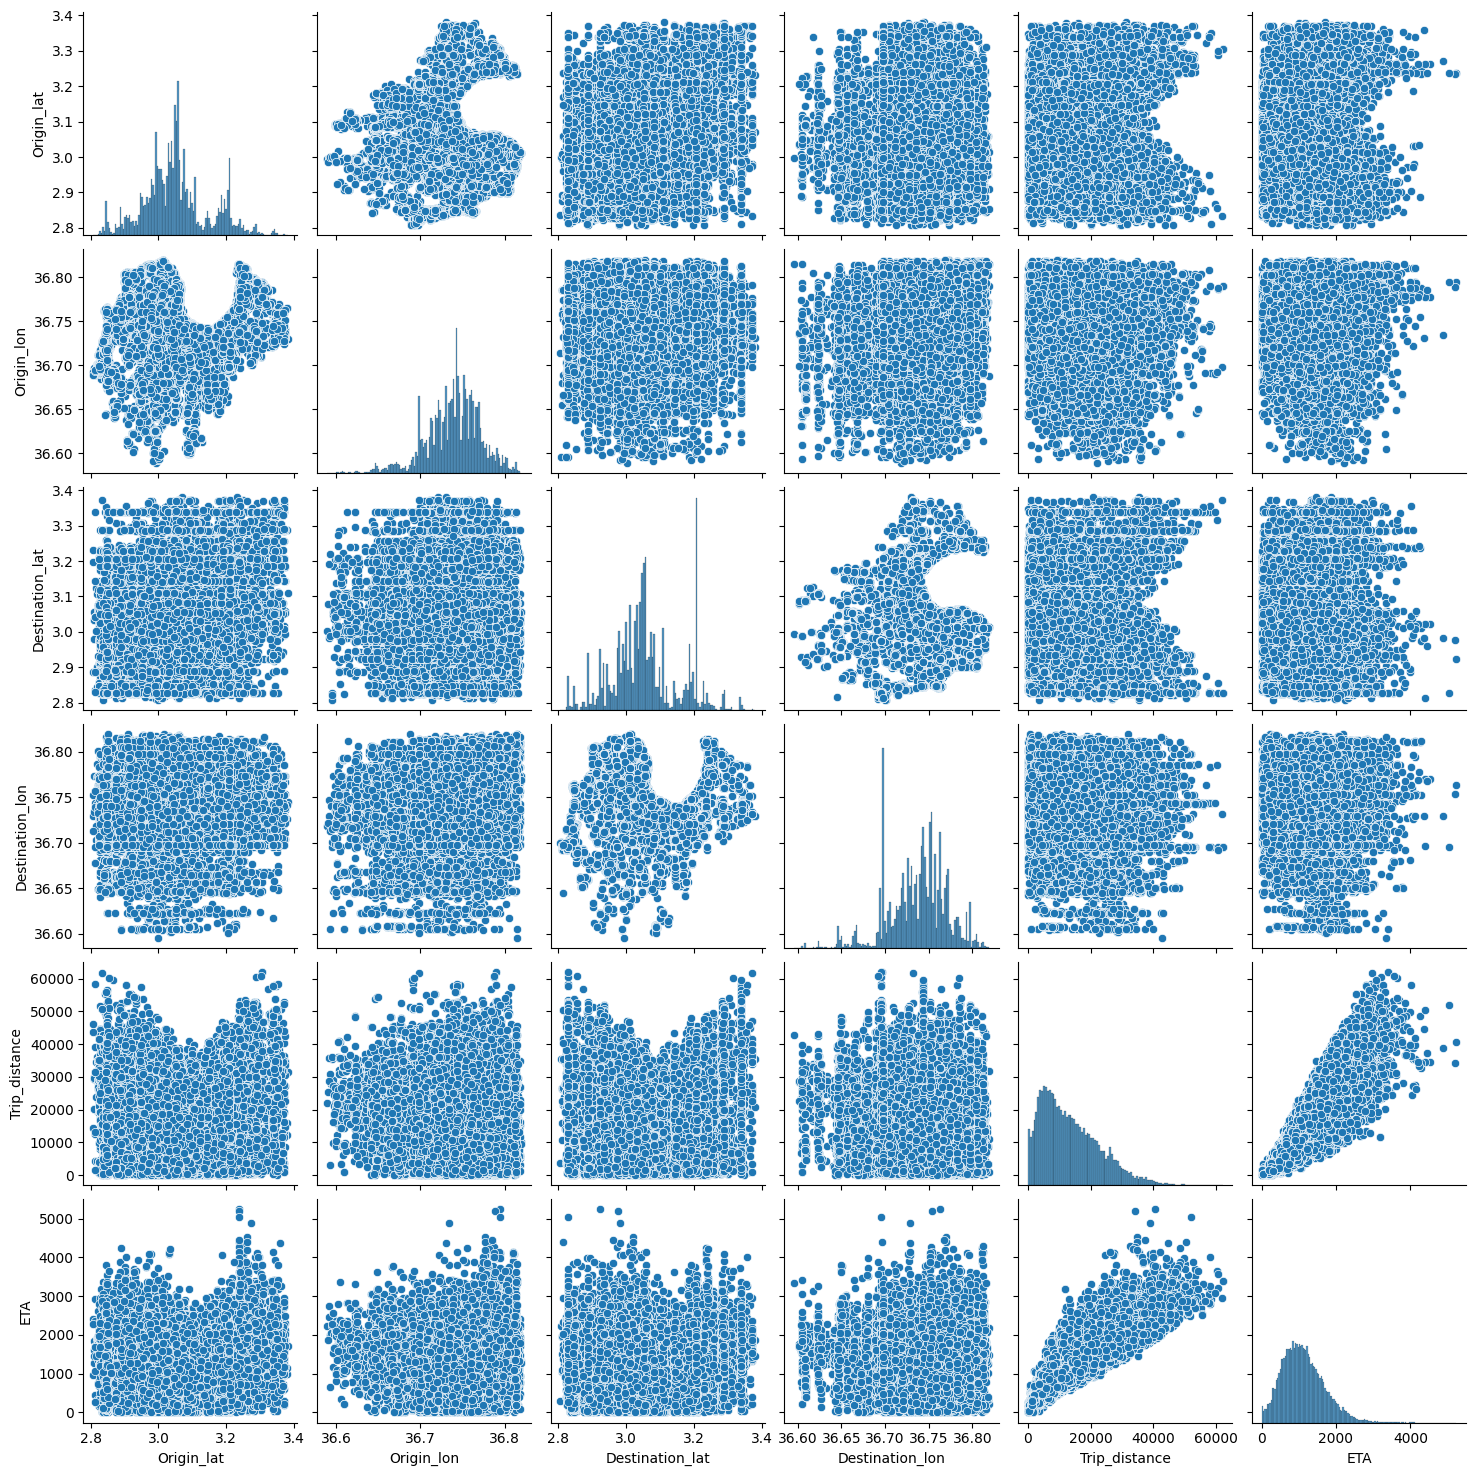

In [ ]:
cols = ['Origin_lat', 'Origin_lon', 'Destination_lat', 'Destination_lon', 'Trip_distance', 'ETA']
sns.pairplot(df_uber[cols])

## 2. Independence of Errors Residuals
What to look for:

* DW ≈ 2 → ✅
* DW < 2 → Positive autocorrelation
* DW > 2 → Negative autocorrelation

In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(model.resid)
print(f"Durbin-Watson: {dw_stat:.3f}")

Durbin-Watson: 2.005


**Interpretation:** Based on durbin-watson test statistic of 2.001, indicates errors are independent

## 3. Constant Variance of Errors
🔍 How to Assess:

* Residuals vs. Fitted plot: Should not show a funnel shape
* Breusch-Pagan test or White test for heteroscedasticity

What to look for:

* Residuals evenly spread → ✅
* Funnel shape of residual vs fitted plot or BP p-value < 0.05 → ❌

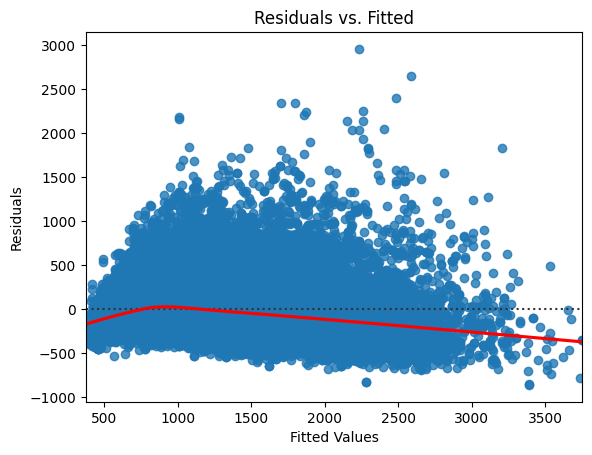

In [ ]:
# Residuals vs. Fitted Plot
fitted_vals = model.fittedvalues
residuals = model.resid

sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted")
plt.show()

In [ ]:
# Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, model.model.exog)
print(f"Breusch-Pagan p-value: {bp_test[1]:.4f}")

Breusch-Pagan p-value: 0.0000


**Interpretation:** Based of funnel shape of residual vs fitted values plot, indicates the residuals do not have constant variance

## 4. Normality of Errors

What to look for:
* Q-Q plot ≈ straight line → ✅
* p-value of JB test < 0.05 → ❌ residuals not normal

🔧 What to Do if Violated:
* Transform the target variable (e.g., log or Box-Cox)
* Trim or Winsorize outliers
* Use robust regression (RLM in statsmodels)

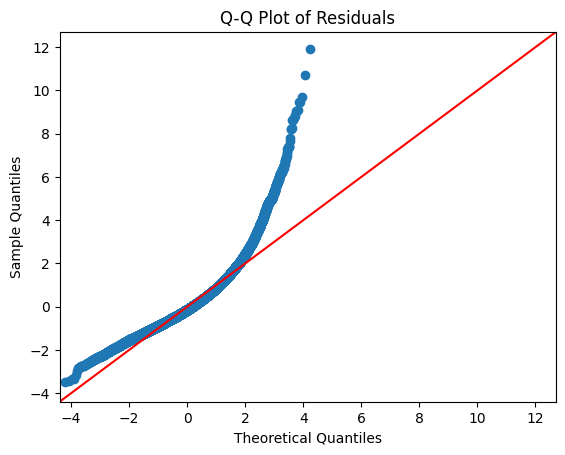

In [ ]:
# Q-Q Plot
sm.qqplot(model.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

In [ ]:
# Jarque-Bera Test
from scipy.stats import jarque_bera
jb_stat, jb_pval = jarque_bera(model.resid)
print(f"Jarque-Bera p-value: {jb_pval:.4f}")

Jarque-Bera p-value: 0.0000


**Interpretation:** QQ plot and JB test p-value of 0.000 indicate that the residuals are not normally distributed

## 5. No Multicollinearity

What to look for:
* VIF < 5 (or 10) → ✅
* VIF > 10 → ❌ serious multicollinearity

🔧 What to Do if Violated:
* Remove or combine correlated predictors
* Use PCA or regularized regression (e.g., Ridge, Lasso)
* Use domain knowledge to drop redundant variables

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Add constant if needed
X_with_const = sm.add_constant(x)

# Calculate VIF for each predictor
vif_df = pd.DataFrame()
vif_df["Variable"] = X_with_const.columns
vif_df["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                 for i in range(X_with_const.shape[1])]
print(vif_df)

        Variable       VIF
0          const  3.117394
1  Trip_distance  1.000000


**Interpretation:** VIF are all small, therefore there are no signs of multicollinearity

---

### Check for Influential Points Using Cook’s Distance

✅ Interpretation
* Points above 4 / n are considered influential.
* You don’t have to drop them — but inspect them individually.
* Useful alongside:
  * Leverage values (influence.hat_matrix_diag)
  * Studentized residuals (influence.resid_studentized_external)

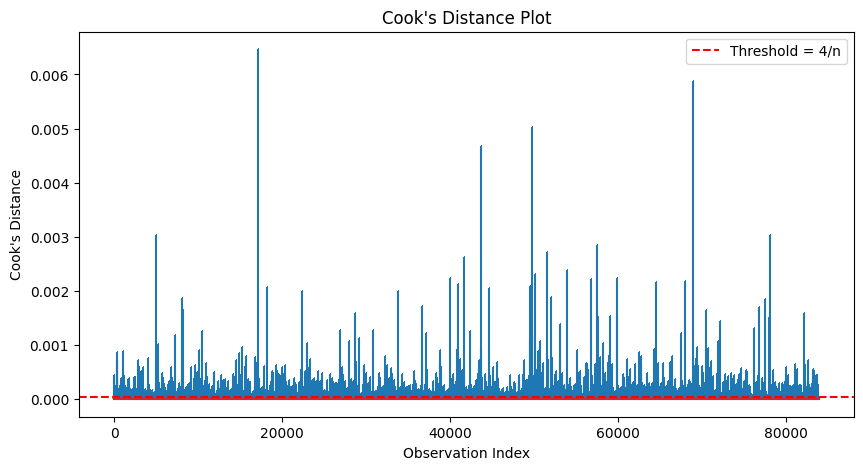

In [ ]:
# Get influence measures
influence = model.get_influence()
cooks_d, p_values = influence.cooks_distance

# Plot Cook's distance
plt.figure(figsize=(10, 5))
plt.stem(range(len(cooks_d)), cooks_d, markerfmt=",")
plt.axhline(4 / len(x), color='red', linestyle='--', label='Threshold = 4/n')
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.legend()
plt.show()

### Optional: View High-Influence Points

In [ ]:
threshold = 4 / len(x)
influential_points = pd.Series(cooks_d).sort_values(ascending=False)
print("Most influential points (Cook's D > 4/n):")
print(influential_points[influential_points > threshold])

Most influential points (Cook's D > 4/n):
17182    0.006466
68996    0.005880
49769    0.005031
43728    0.004674
78179    0.003041
           ...   
54759    0.000048
58739    0.000048
54764    0.000048
9963     0.000048
27816    0.000048
Length: 4420, dtype: float64


---

# Diagnostic Wrapper Function

In [ ]:
def ols_diagnostics(model: sm.regression.linear_model.RegressionResultsWrapper, X, y):
    """
    Displays key diagnostic plots and statistics for OLS assumptions:
    1. Linearity
    2. Independence of Errors
    3. Homoscedasticity
    4. Normality of Residuals
    5. Multicollinearity
    6. Influential Outliers via Cook's Distance
    """

    residuals = model.resid
    fitted_vals = model.fittedvalues

    # 1. Linearity and Homoscedasticity - Residuals vs Fitted Plot
    plt.figure(figsize=(8, 4))
    sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red'})
    plt.axhline(0, linestyle='--', color='black')
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs Fitted")
    # Interpretation: Look for random scatter. Curved shape → non-linearity. Funnel shape → heteroscedasticity.
    plt.show()

    # 2. Independence of Errors - Durbin-Watson Test
    dw_stat = durbin_watson(residuals)
    print(f"Durbin-Watson: {dw_stat:.4f}")
    # Interpretation: DW ≈ 2 → residuals are independent. DW < 2 → positive autocorrelation. DW > 2 → negative autocorrelation.

    # 3. Homoscedasticity - Breusch-Pagan Test
    bp_test = het_breuschpagan(residuals, model.model.exog)
    print(f"Breusch-Pagan p-value: {bp_test[1]:.4f}")
    # Interpretation: p < 0.05 → heteroscedasticity likely present.

    # 4. Normality of Residuals
    fig = sm.qqplot(residuals, line='45', fit=True)
    plt.title("Q-Q Plot of Residuals")
    # Interpretation: Points should fall roughly on the 45-degree line if residuals are normal.
    plt.show()

    jb_stat, jb_pval = jarque_bera(residuals)
    print(f"Jarque-Bera p-value: {jb_pval:.4f}")
    # Interpretation: p < 0.05 → residuals are not normally distributed.

    # print(f"Skewness: {skew(residuals):.4f}")
    # print(f"Kurtosis: {kurtosis(residuals):.4f}")
    # # Interpretation: Skew ≠ 0 or Kurtosis ≠ 3 suggests non-normality.

    # 5. Multicollinearity - Variance Inflation Factor (VIF)
    if isinstance(X, pd.DataFrame):
        X_vals = sm.add_constant(X)
        vif_df = pd.DataFrame()
        vif_df["Variable"] = X_vals.columns
        vif_df["VIF"] = [variance_inflation_factor(X_vals.values, i) for i in range(X_vals.shape[1])]
        print("\nVIF Table:")
        print(vif_df)
        # Interpretation: VIF > 5 or 10 indicates high multicollinearity.

    # 6. Outliers/Influential Points - Cook's Distance
    influence = model.get_influence()
    cooks_d, _ = influence.cooks_distance
    threshold = 4 / len(X)

    plt.figure(figsize=(10, 4))
    plt.stem(range(len(cooks_d)), cooks_d, markerfmt=",")
    plt.axhline(threshold, color='red', linestyle='--', label='Threshold = 4/n')
    plt.xlabel('Observation Index')
    plt.ylabel("Cook's Distance")
    plt.title("Cook's Distance Plot")
    plt.legend()
    # Interpretation: Points above the threshold line are potentially influential and should be reviewed.
    plt.show()

    influential = pd.Series(cooks_d).sort_values(ascending=False)
    high_influence = influential[influential > threshold]
    if not high_influence.empty:
        print("High influence observations (Cook's D > 4/n):")
        print(high_influence)

In [ ]:
# ols_diagnostics(model, x, y)

---

# Model Evaluation & Cross Validation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

def cross_validate_ols(X: pd.DataFrame, y: pd.Series, k: int = 5, random_state: int = 42):
    """
    Perform k-fold cross-validation using statsmodels OLS and report MSE, RMSE, and R² scores.

    Parameters:
        X (pd.DataFrame): Feature matrix (excluding constant).
        y (pd.Series): Target variable.
        k (int): Number of folds.
        random_state (int): Random seed for reproducibility.

    Returns:
        dict: Dictionary with lists and mean of MSE, RMSE, and R² scores.
    """
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    mse_scores = []
    rmse_scores = []
    r2_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Add constant for intercept
        X_train_const = sm.add_constant(X_train)
        X_test_const = sm.add_constant(X_test)

        # Fit model
        model = sm.OLS(y_train, X_train_const).fit()
        y_pred = model.predict(X_test_const)

        # Metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

    results = {
        "MSEs": mse_scores,
        "RMSEs": rmse_scores,
        "R2s": r2_scores,
        "Mean MSE": np.mean(mse_scores),
        "Mean RMSE": np.mean(rmse_scores),
        "Mean R2": np.mean(r2_scores)
    }

    return results

In [ ]:
cross_validate_ols(x, y)

{'MSEs': [61523.788887333285,
  62866.08733262609,
  59757.16533506892,
  62191.69346410868,
  61181.82979541161],
 'RMSEs': [np.float64(248.03989374157797),
  np.float64(250.731105634355),
  np.float64(244.45278753793937),
  np.float64(249.38262462350636),
  np.float64(247.3496104614107)],
 'R2s': [0.8044558845129899,
  0.8036694352270597,
  0.8097363441562793,
  0.806919077342996,
  0.8068537957251076],
 'Mean MSE': np.float64(61504.11296290972),
 'Mean RMSE': np.float64(247.99120439975786),
 'Mean R2': np.float64(0.8063269073928865)}

# Regression Model Comparison

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ETA   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                 3.495e+05
Date:                Thu, 23 Oct 2025   Prob (F-statistic):               0.00
Time:                        23:54:34   Log-Likelihood:            -5.8179e+05
No. Observations:               83924   AIC:                         1.164e+06
Df Residuals:                   83922   BIC:                         1.164e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           375.3120      1.511    248.306

In [ ]:
# cols = ['Origin_lat', 'Destination_lon', 'Trip_distance']
cols = ['Trip_distance']

x_subset = df_uber[cols]

model_subset = sm.OLS(y, sm.add_constant(x_subset)).fit() # Nested model
print(model_subset.summary())

                            OLS Regression Results                            
Dep. Variable:                    ETA   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                 3.495e+05
Date:                Thu, 23 Oct 2025   Prob (F-statistic):               0.00
Time:                        23:54:34   Log-Likelihood:            -5.8179e+05
No. Observations:               83924   AIC:                         1.164e+06
Df Residuals:                   83922   BIC:                         1.164e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           375.3120      1.511    248.306

---

✅ 1. Compare AIC and BIC (Works for any models)
* Lower values are better (penalizes complexity)
* Use for non-nested and nested models alike

✅ 2. Compare Adjusted R²
* Checks model explanatory power with complexity accounted for
* Higher Adj. R² = better

✅ 3. Likelihood Ratio Test (Only for nested models)
* p < 0.05 → full model is significantly better
* Use this only if model_subset is nested in model

✅ 4. F-test (Another option for nested models)
* Same logic as LRT: tests whether extra variables in full model improve fit


In [ ]:
def compare_ols_models(model, model_subset, X_full, X_subset, y):
    """
    Compare two OLS models: a full model and a subset model.
    Prints AIC, BIC, Adj. R^2, LRT, F-test, and cross-validated RMSE and R^2.
    """
    print("=== Model Fit Comparison ===")
    print(f"Full Model AIC: {model.aic:.2f}")
    print(f"Subset Model AIC: {model_subset.aic:.2f}")
    print(f"Full Model BIC: {model.bic:.2f}")
    print(f"Subset Model BIC: {model_subset.bic:.2f}")

    print(f"\nFull Model Adjusted R²: {model.rsquared_adj:.4f}")
    print(f"Subset Model Adjusted R²: {model_subset.rsquared_adj:.4f}")

    # Likelihood Ratio Test
    # "Does adding more predictors significantly improve model fit?"
    # $H_0$: Reduced model is sufficient
    # $H_1$: Full model fits the data significantly
    # p-value < 0.05 → Reject $H_0$: additional predictors significantly improve fit
    try:
        lr_stat, lr_pval, lr_df = model.compare_lr_test(model_subset)
        print("\n=== Likelihood Ratio Test ===")
        print(f"LR Statistic: {lr_stat:.4f}")
        print(f"p-value: {lr_pval:.4f}")
        print(f"DF Difference: {lr_df}")
    except Exception:
        print("\nLikelihood Ratio Test not available (models may not be nested).")

    # F-Test
    # "Does adding more predictors significantly improve model fit?"
    # $H_0$: Reduced model is sufficient
    # $H_1$: Full model fits the data significantly
    # p-value < 0.05 → Reject $H_0$: additional predictors significantly improve fit
    try:
        f_stat, f_pval, f_df = model.compare_f_test(model_subset)
        print("\n=== F-Test ===")
        print(f"F-statistic: {f_stat:.4f}")
        print(f"p-value: {f_pval:.4f}")
        print(f"DF Difference: {f_df}")
    except Exception:
        print("\nF-Test not available (models may not be nested).")

    # Cross-validation
    print("\n=== Cross-Validation ===")
    cv_full = cross_validate_ols(X_full, y)
    cv_subset = cross_validate_ols(X_subset, y)

    print(f"Full Model Mean RMSE: {cv_full['Mean RMSE']:.4f}")
    print(f"Subset Model Mean RMSE: {cv_subset['Mean RMSE']:.4f}")
    print(f"Full Model Mean R²: {cv_full['Mean R2']:.4f}")
    print(f"Subset Model Mean R²: {cv_subset['Mean R2']:.4f}")

In [ ]:
compare_ols_models(model=model,
                   model_subset=model_subset,
                   X_full=x,
                   X_subset=x_subset,
                   y=y)

=== Model Fit Comparison ===
Full Model AIC: 1163586.05
Subset Model AIC: 1163586.05
Full Model BIC: 1163604.73
Subset Model BIC: 1163604.73

Full Model Adjusted R²: 0.8064
Subset Model Adjusted R²: 0.8064

=== Likelihood Ratio Test ===
LR Statistic: -0.0000
p-value: nan
DF Difference: 0.0

=== F-Test ===
F-statistic: nan
p-value: nan
DF Difference: 0.0

=== Cross-Validation ===
Full Model Mean RMSE: 247.9912
Subset Model Mean RMSE: 247.9912
Full Model Mean R²: 0.8063
Subset Model Mean R²: 0.8063


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:2284: RuntimeWarning: invalid value encountered in scalar divide
  f_value = (ssr_restr - ssr_full) / df_diff / ssr_full * df_full


# Linear Regression with Categorical Feature

In [ ]:
# model fitting using dayofweek feature
import statsmodels.formula.api as smf

# model_cat = smf.ols(formula='ETA ~ Origin_lat + Origin_lon + Destination_lat + Destination_lon + Trip_distance + C(dayofweek)', data=df_uber).fit()
model_cat = smf.ols(formula='ETA ~ Trip_distance + C(dayofweek)', data=df_uber).fit()
print(model_cat.summary())

                            OLS Regression Results                            
Dep. Variable:                    ETA   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                 4.999e+04
Date:                Thu, 23 Oct 2025   Prob (F-statistic):               0.00
Time:                        23:54:34   Log-Likelihood:            -5.8174e+05
No. Observations:               83924   AIC:                         1.163e+06
Df Residuals:                   83916   BIC:                         1.164e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

---

# Categorical Feature Interpretation:
* One category must be used as the reference (baseline).
* All other dummy variables are interpreted relative to that baseline.
* In your model, Friday is the omitted category — so all other day coefficients tell you:
  * “How much higher/lower is ETA on this day, compared to Friday?”

# Change Categorical Reference/Baseline

In [ ]:
model_cols = [
#  'Origin_lat',
#  'Origin_lon',
#  'Destination_lat',
#  'Destination_lon',
 'Trip_distance',
 'dayofweek'
 ]

x_cat = df_uber[model_cols]
y = df_uber['ETA']

# Let's say you want Mondayas the baseline
x_cat['dayofweek'] = pd.Categorical(x_cat['dayofweek'],
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# The dropped dummy is your reference level. In this case Monday
x_cat = pd.get_dummies(x_cat, columns=['dayofweek'], drop_first=True, dtype=int)

x_cat = sm.add_constant(x_cat)

model = sm.OLS(y, x_cat).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ETA   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                 4.999e+04
Date:                Thu, 23 Oct 2025   Prob (F-statistic):               0.00
Time:                        23:54:34   Log-Likelihood:            -5.8174e+05
No. Observations:               83924   AIC:                         1.163e+06
Df Residuals:                   83916   BIC:                         1.164e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 386.9279    

/tmp/ipython-input-3839124725.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cat['dayofweek'] = pd.Categorical(x_cat['dayofweek'],


---

# Coefficient Variability: sklearn

* Coefficient values are estimates, they can differ with training the model on different partitions of the dataset
* We can assess the variability in the coefficient values
  * train `n` linear regression models with `n` random states
  * Assess distribution of the coefficient estimates
  * This can also be assessed more efficiently using sklearn using `cross-validation` found in this notebook: https://colab.research.google.com/drive/10aceC8rDmCHoK0ieHluYKa1YF5s9ReK1#scrollTo=c027d68d

In [ ]:
# Train 500 models on different partitions of X
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler

s = dict()

for i in np.linspace(1, 500, num=500):

    # split data
    X_train, X_test, y_train, y_test = train_test_split(
        x_cat, y, test_size=0.3, random_state=int(i)) # 500 different random states

    # train model
    linreg = LinearRegression().fit(X_train, y_train)

    # store coefficients
    s[str(int(i))] = pd.Series(linreg.coef_)

In [ ]:
# put coefficients in a dataframe

df_coef_var = pd.concat(s, axis=1)
df_coef_var.index = linreg.feature_names_in_
df_coef_var = df_coef_var.T

df_coef_var.head()

const  Trip_distance  dayofweek_Tuesday  dayofweek_Wednesday  \
1    0.0       0.054486          -9.269987           -22.044691   
2    0.0       0.054465          -6.644801           -19.125191   
3    0.0       0.054412         -11.760915           -23.062539   
4    0.0       0.054532         -10.251733           -19.711874   
5    0.0       0.054435          -8.709595           -19.213261   

   dayofweek_Thursday  dayofweek_Friday  dayofweek_Saturday  dayofweek_Sunday  
1           -0.634527        -20.433216          -19.737111         -4.425650  
2            1.002600        -18.752883          -17.128267         -4.100547  
3           -4.952431        -23.173156          -21.491334         -7.444766  
4           -2.221152        -19.562038          -18.947143         -7.967230  
5            0.103623        -19.613439          -15.311198         -2.521568

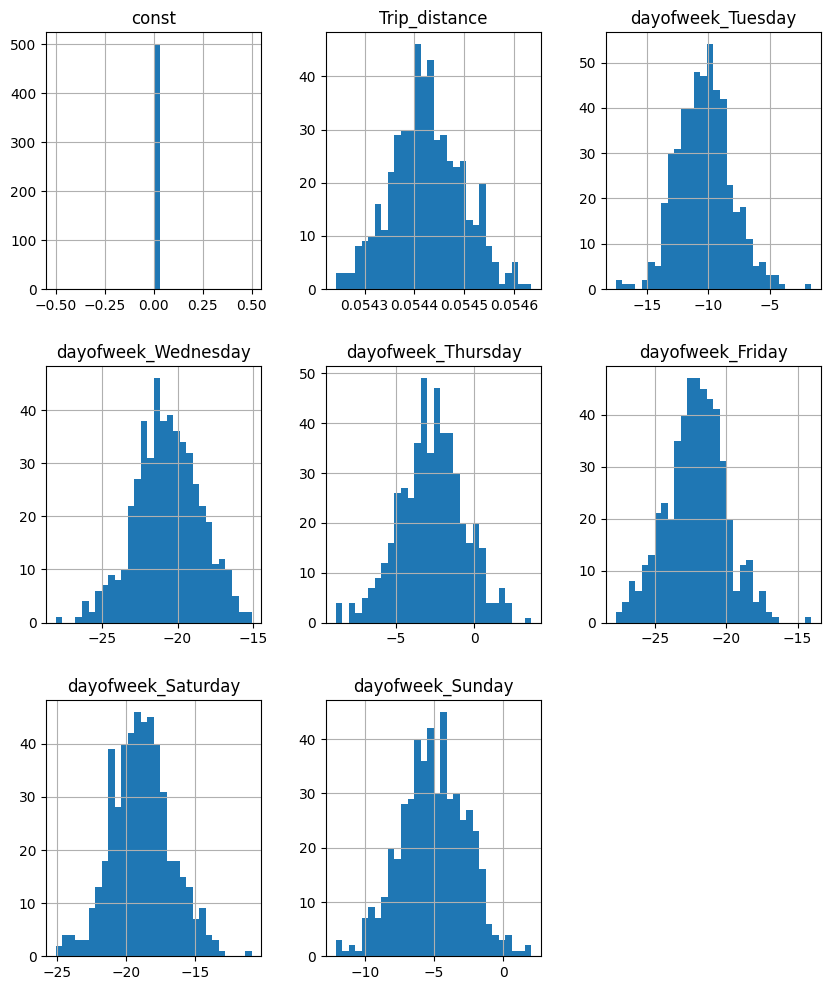

In [ ]:
# Display variability of coefficients

df_coef_var.hist(bins=30, figsize=(10, 12))
plt.show()

In [ ]:
# Summarize variability of coefficients

coeff_summary = df_coef_var.agg(["mean", "std"])
coeff_summary

const  Trip_distance  dayofweek_Tuesday  dayofweek_Wednesday  \
mean    0.0       0.054425         -10.370444           -20.685617   
std     0.0       0.000071           2.177775             2.145664   

      dayofweek_Thursday  dayofweek_Friday  dayofweek_Saturday  \
mean           -2.718954        -22.141758          -18.891946   
std             2.054038          2.062600            2.172875   

      dayofweek_Sunday  
mean         -5.048763  
std           2.402259

## Coefficient Direction (sign): sklearn

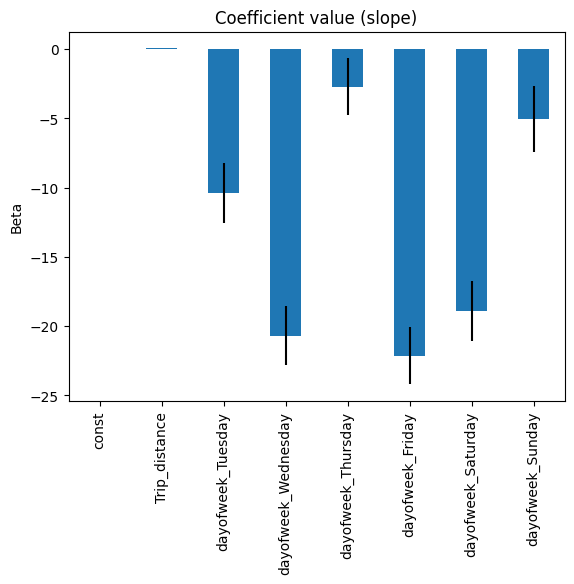

In [ ]:
s = pd.Series(
    coeff_summary.loc["mean"],
    index=linreg.feature_names_in_,
)

s.plot.bar(yerr=coeff_summary.loc["std"])
plt.ylabel("Beta")
plt.title("Coefficient value (slope)")
plt.show()

* Plot indicates the `dayofweek` estimates are have much more variability than `Trip_distance` although it's much smaller in magnitude

## Coefficient Absolute Value: sklearn

* This is the proxy `feature importance` value for regression models

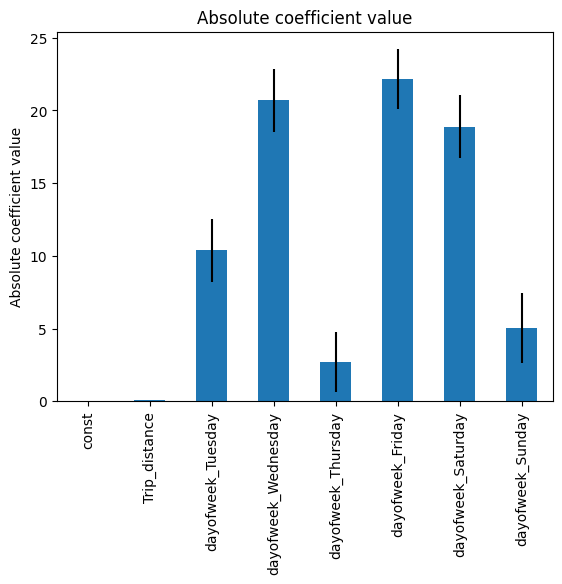

In [ ]:
# Plot mean coefficient and std

s = pd.Series(
    np.abs(coeff_summary.loc["mean"]),
    index=linreg.feature_names_in_,
)

s.plot.bar(yerr=coeff_summary.loc["std"])
plt.ylabel("Absolute coefficient value")
plt.title("Absolute coefficient value")
plt.show()

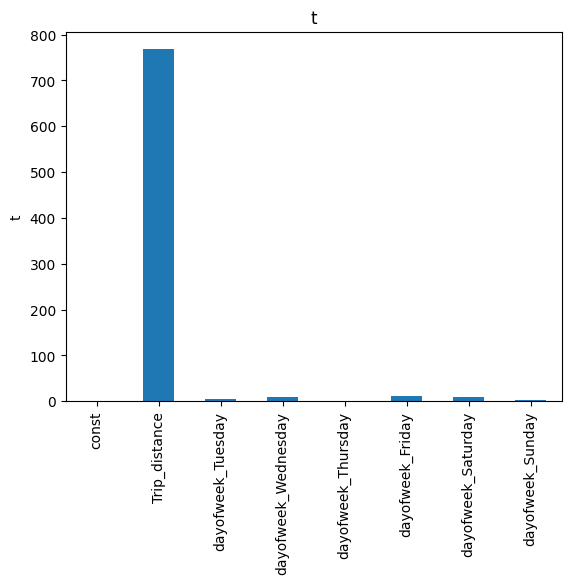

In [ ]:
# estimate and plot t

s = pd.Series(
    np.abs(coeff_summary.loc["mean"])/coeff_summary.loc["std"],
    index=linreg.feature_names_in_,
)

s.plot.bar()
plt.ylabel("t")
plt.title("t")
plt.show()

* Plot indicates that though the magnitude of `Trip_distance` coefficient is large, the large t-statistic indicates I can have more trust in the coefficient value bc it has less variability (low std)

---

## Coefficient Direction (sign)

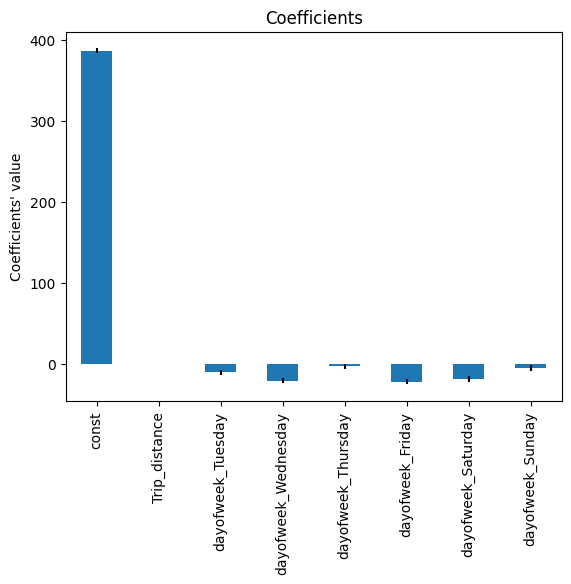

In [ ]:
# Coefficients value

s = pd.Series(
    model.params,
    index=x_cat.columns,
)

s.plot.bar(yerr=model.bse)
plt.ylabel("Coefficients' value")
plt.title("Coefficients")
plt.show()

## Coefficient absolute value - feature importance

This is what we normally use as a measure of feature importance.

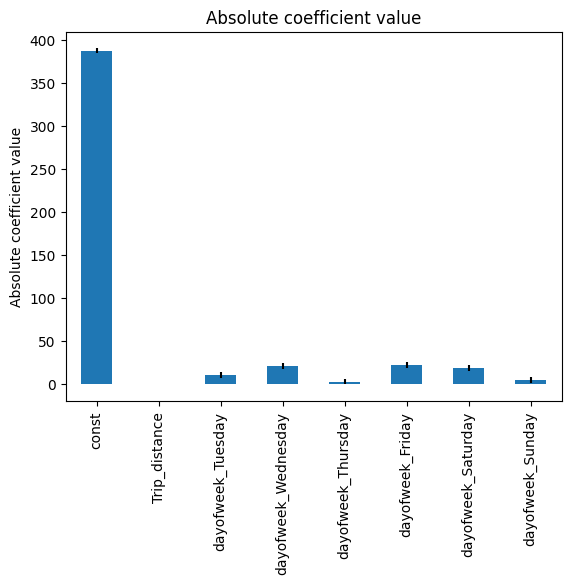

In [ ]:
# Plot mean coefficient and std

s = pd.Series(
    np.abs(model.params),
    index=x_cat.columns,
)

s.plot.bar(yerr=model.bse)
plt.ylabel("Absolute coefficient value")
plt.title("Absolute coefficient value")
plt.show()

## t-statistic

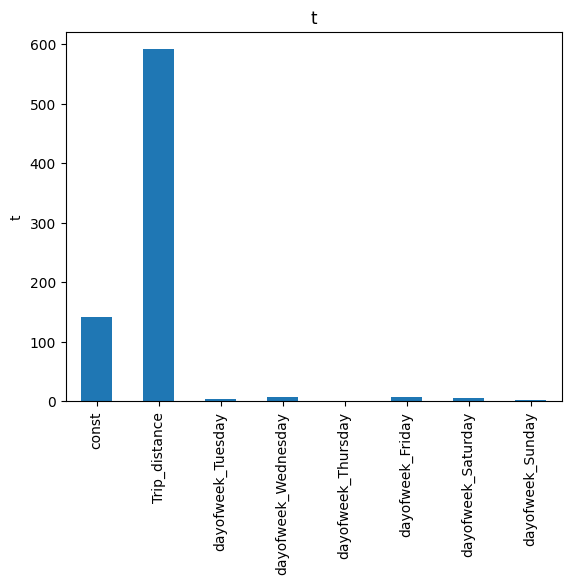

In [ ]:
# estimate and plot t

s = pd.Series(
    np.abs(model.tvalues),
    index=x_cat.columns,
)

s.plot.bar()
plt.ylabel("t")
plt.title("t")
plt.show()

The large t-statistic for `Trip_distance` means that the probabability of B=0 is very low

# Prediction: Confidence intervals

* Statsmodels documentation is quite poor in my opinion, so here I leave a link to an explanation of the values we obtain when fitting `OLS`: https://stackoverflow.com/questions/60963178/what-does-obs-confidence-interval-in-statsmodels-linear-regression-in-python

* We will plot the predictions and its conficence intervals vs the truth, to get a better view of the model performance.
* You can plot confidence intervals for test set predictions

In [ ]:
# Obtain first 50 predictions for train set

df_predictions = model.get_prediction(x_cat).summary_frame()

df_predictions.head()

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  2523.109180  3.215169    2516.807474    2529.410887   2037.262029   
1   589.610415  2.560406     584.592039     594.628790    103.778214   
2   763.434265  2.413023     758.704759     768.163772    277.604963   
3  1652.671220  2.560946    1647.651786    1657.690653   1166.839008   
4  2369.236518  3.179490    2363.004742    2375.468295   1883.390269   

   obs_ci_upper  
0   3008.956332  
1   1075.442615  
2   1249.263568  
3   2138.503431  
4   2855.082767

In [ ]:
# add target variable to results

df_predictions["true"] = y

df_predictions.head()

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  2523.109180  3.215169    2516.807474    2529.410887   2037.262029   
1   589.610415  2.560406     584.592039     594.628790    103.778214   
2   763.434265  2.413023     758.704759     768.163772    277.604963   
3  1652.671220  2.560946    1647.651786    1657.690653   1166.839008   
4  2369.236518  3.179490    2363.004742    2375.468295   1883.390269   

   obs_ci_upper  true  
0   3008.956332  2784  
1   1075.442615   576  
2   1249.263568   526  
3   2138.503431  3130  
4   2855.082767  2138

In [ ]:
# sort results by value of the prediction

df_predictions = df_predictions.sort_values(by=["mean"])

df_predictions.head()

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
29446  364.899922  2.554718     359.892695     369.907148   -120.932164   
45412  364.899922  2.554718     359.892695     369.907148   -120.932164   
19092  364.899922  2.554718     359.892695     369.907148   -120.932164   
46956  364.954353  2.554674     359.947211     369.961494   -120.877732   
5926   364.954353  2.554674     359.947211     369.961494   -120.877732   

       obs_ci_upper  true  
29446    850.732007     1  
45412    850.732007     1  
19092    850.732007     4  
46956    850.786437     1  
5926     850.786437     1

Text(0.5, 0, 'predictions')

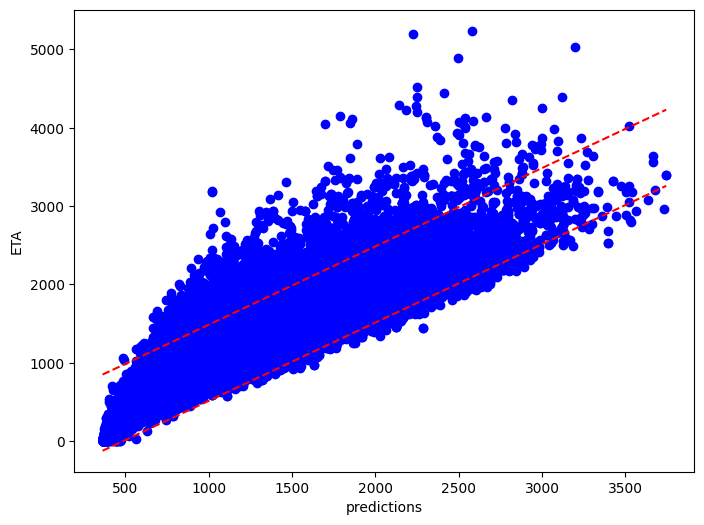

In [ ]:
# PLot predictions vs target plus confidence intervals: on train set

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(df_predictions["mean"], df_predictions["true"], "bo")
ax.plot(df_predictions["mean"], df_predictions["obs_ci_upper"], "r--")
ax.plot(df_predictions["mean"], df_predictions["obs_ci_lower"], "r--")
ax.set_ylabel("ETA")
ax.set_xlabel("predictions")

In [ ]:
# # Plot all results

# df = results.get_prediction(X_test).summary_frame()
# df["true"] = y_test
# df = df.sort_values(by=["mean"])

# fig, ax = plt.subplots(figsize=(8, 6))

# ax.plot(df["mean"], df["true"], "bo")
# ax.plot(df["mean"], df["obs_ci_upper"], "r--")
# ax.plot(df["mean"], df["obs_ci_lower"], "r--")
# ax.set_ylabel("House price")
# ax.set_xlabel("predictions")

---

# Linear Regression with MinMaxScaling(Trip_distance)

* Coefficient Interpretation with MinMaxScaling
  * `the coefficients now describe how the target variable changes when a feature moves from its minimum to its maximum`, assuming everything else stays the same.

* Trip distance range = (1 - 62028)
  * `Trip_dsiatnce` coefficient of `3376` means that if `Trip_distance` increases from its lowest value to highest value, the predicted `ETA` increases by `3376` units
  * If it changes by just half that range (e.g., from 1 to 31014), then the effect is half: predicted outcome increases by ~1688: units.



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(x_cat[['Trip_distance']])
scaled_trip_distance_train = scaler.transform(x_cat[['Trip_distance']])
# scaled_trip_distance_test = scaler.transform(df_test[['Trip_distance']])
x_cat_scaled = x_cat.copy()
x_cat_scaled['Trip_distance'] = scaled_trip_distance_train

# fit linear regression model
results = sm.OLS(y, x_cat_scaled).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    ETA   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                 4.999e+04
Date:                Thu, 23 Oct 2025   Prob (F-statistic):               0.00
Time:                        23:54:55   Log-Likelihood:            -5.8174e+05
No. Observations:               83924   AIC:                         1.163e+06
Df Residuals:                   83916   BIC:                         1.164e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 386.9823    

In [ ]:
# # Undo the scaling by multiplying the max
index = 0
print(x_cat['Trip_distance'].min())
print(x_cat['Trip_distance'].max())
print(x_cat.loc[index, 'Trip_distance'])
print(scaler.inverse_transform(x_cat_scaled[['Trip_distance']])[index])

1
62028
39627
[39627.]


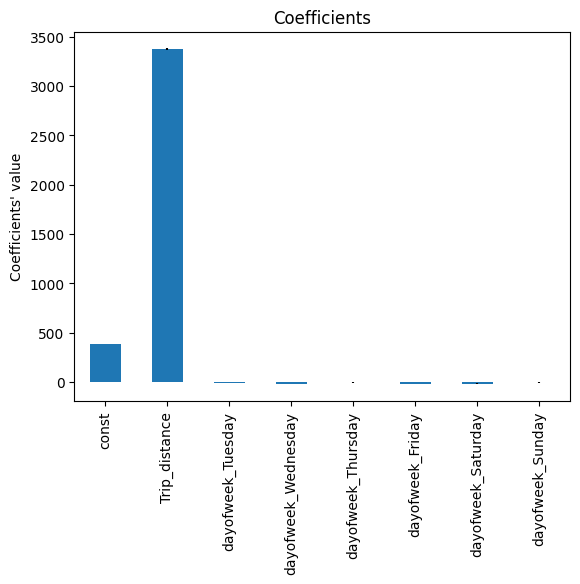

In [ ]:
# Coefficients value

pd.Series(results.params, index=x_cat_scaled.columns).plot.bar(
    yerr=pd.Series(results.bse))

plt.ylabel("Coefficients' value")
plt.title("Coefficients")
plt.show()

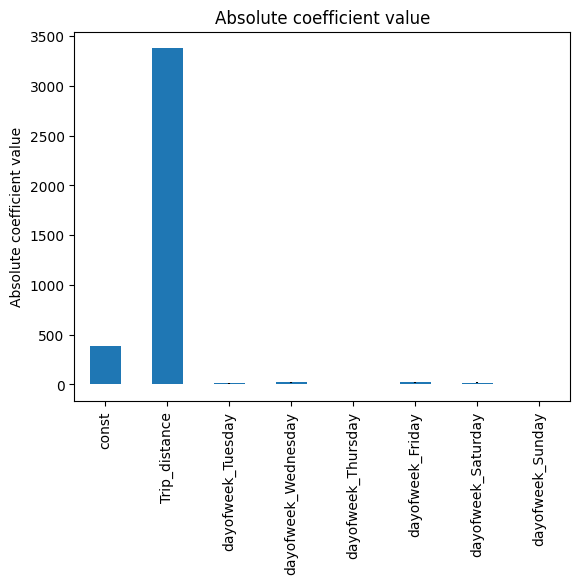

In [ ]:
# Plot mean coefficient and std

s = pd.Series(
    np.abs(results.params),
    index=x_cat_scaled.columns,
)

s.plot.bar(yerr=model.bse)
plt.ylabel("Absolute coefficient value")
plt.title("Absolute coefficient value")
plt.show()

---

# Linear Regression with StandardScaler(Trip_distance)

* `StandardScaler`: mean = 0, Standard Dev = 1
  * model sees every feature in standard deviation units, not its original units
* ✅ Interpreting the coefficients after standardization:
  * Each coefficient now represents `the change in the predicted target for a 1 standard deviation increase in that feature`, holding all others constant.

* Example:
  * Model’s coefficient for standardized Age is 4.2
  * If someone’s age increases by 1 standard deviation above the mean age, your predicted target increases by 4.2 units.
  * If their age is 2 SDs above the mean → prediction increases by 8.4 units.
  * So when all the features = 0 in the model’s eyes, the intercept represents the “baseline” prediction — for someone at average age, who is Color = blue.


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

standard_scaler = StandardScaler().fit(x_cat[['Trip_distance']])
standard_scaler_trip_distance_train = standard_scaler.transform(x_cat[['Trip_distance']])
# scaled_trip_distance_test = scaler.transform(df_test[['Trip_distance']])
x_cat_standard_scaled = x_cat.copy()
x_cat_standard_scaled ['Trip_distance'] = standard_scaler_trip_distance_train

# fit linear regression model
results = sm.OLS(y, x_cat_standard_scaled).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    ETA   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                 4.999e+04
Date:                Thu, 23 Oct 2025   Prob (F-statistic):               0.00
Time:                        23:54:55   Log-Likelihood:            -5.8174e+05
No. Observations:               83924   AIC:                         1.163e+06
Df Residuals:                   83916   BIC:                         1.164e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1123.2626    

In [ ]:
# # Undo the scaling
index = 0
print(x_cat['Trip_distance'].mean())
print(x_cat['Trip_distance'].std())
print(x_cat.loc[index, 'Trip_distance'])
print(standard_scaler.inverse_transform(x_cat_standard_scaled[['Trip_distance']])[index])

13527.821409847005
9296.716006063634
39627
[39627.]


## Coefficient Interpretation: StandardScaler()
  * If `Trip_distance` increases 1 SD above the mean, so from `13527` to `13527 (mean) + 9297 (std) = 22824` the `ETA` would increase `506` units, all else constant

## Calculate Prediction Manually: Standard Scaler LR Model

In [ ]:
index = 0
x_cat_standard_scaled.loc[index]

const                  1.000000
Trip_distance          2.807371
dayofweek_Tuesday      0.000000
dayofweek_Wednesday    1.000000
dayofweek_Thursday     0.000000
dayofweek_Friday       0.000000
dayofweek_Saturday     0.000000
dayofweek_Sunday       0.000000
Name: 0, dtype: float64

In [ ]:
# coefficient values
results.params

const                  1123.262601
Trip_distance           506.027830
dayofweek_Tuesday       -10.578658
dayofweek_Wednesday     -20.761449
dayofweek_Thursday       -2.742242
dayofweek_Friday        -22.191240
dayofweek_Saturday      -18.935831
dayofweek_Sunday         -5.223754
dtype: float64

In [ ]:
# prediction manual calculation
x_cat_standard_scaled.loc[index, 'Trip_distance'] * results.params.loc['Trip_distance'] + (1 * results.params.loc['dayofweek_Wednesday']) + results.params.loc['const']

np.float64(2523.109180427694)

In [ ]:
# actual prediction
y.loc[index]

np.int64(2784)

In [ ]:
# calculate predictions programmitically
df_predictions_standscaled = results.get_prediction(x_cat_standard_scaled).summary_frame()
df_predictions_standscaled.head()

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  2523.109180  3.215169    2516.807474    2529.410887   2037.262029   
1   589.610415  2.560406     584.592039     594.628790    103.778214   
2   763.434265  2.413023     758.704759     768.163772    277.604963   
3  1652.671220  2.560946    1647.651786    1657.690653   1166.839008   
4  2369.236518  3.179490    2363.004742    2375.468295   1883.390269   

   obs_ci_upper  
0   3008.956332  
1   1075.442615  
2   1249.263568  
3   2138.503431  
4   2855.082767

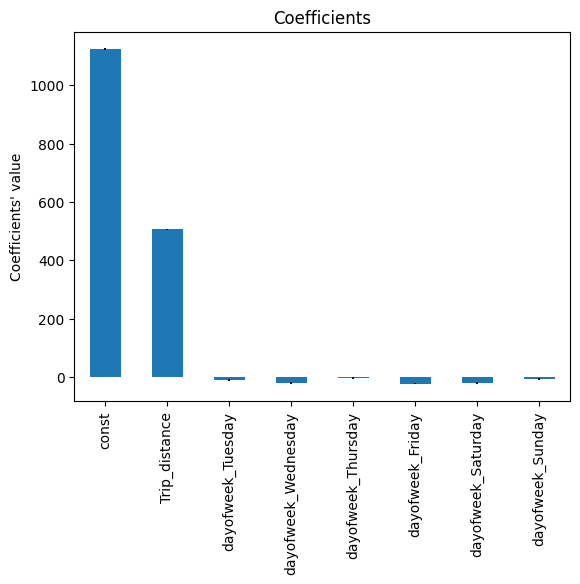

In [ ]:
# Coefficients value

pd.Series(results.params, index=x_cat_standard_scaled.columns).plot.bar(
    yerr=pd.Series(results.bse))

plt.ylabel("Coefficients' value")
plt.title("Coefficients")
plt.show()

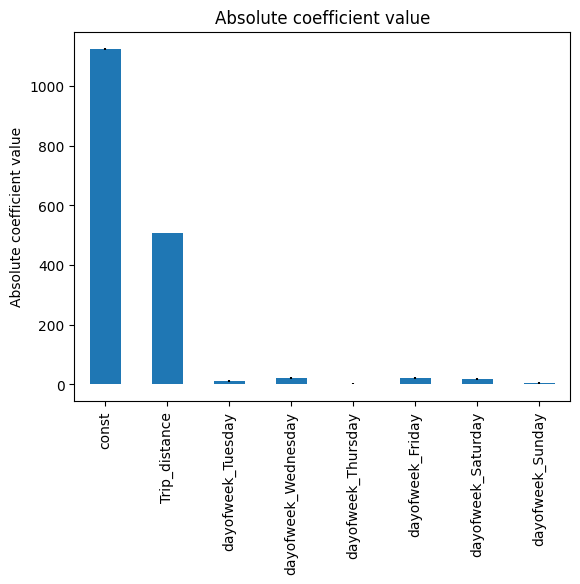

In [ ]:
# Plot mean coefficient and std

s = pd.Series(
    np.abs(results.params),
    index=x_cat_standard_scaled.columns,
)

s.plot.bar(yerr=model.bse)
plt.ylabel("Absolute coefficient value")
plt.title("Absolute coefficient value")
plt.show()

* Notice that the `t-statistic` is the same regardless of scaling

---

# Effect plots

The effect is the coefficient multiplied by the feature value. If we do this for each observation, we can better understand the contribution of each feature to the target.

Text(0, 0.5, 'Effects (coeff x feature)')

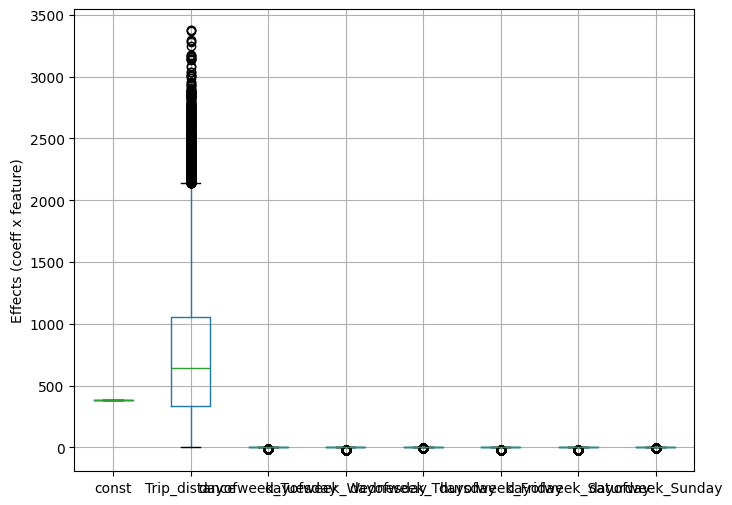

In [ ]:
# multiply the coefficients by the feature values
effects = model.params * x_cat

# plot the effects
effects.boxplot(figsize=(8,6))
plt.ylabel("Effects (coeff x feature)")

* `Trip_distance` has much larger effect relative toany other feature

In [ ]:
effects

const  Trip_distance  dayofweek_Tuesday  dayofweek_Wednesday  \
0      386.927868    2156.942762          -0.000000           -20.761449   
1      386.927868     213.261204         -10.578658            -0.000000   
2      386.927868     395.442228          -0.000000            -0.000000   
3      386.927868    1270.967105          -0.000000            -0.000000   
4      386.927868    1992.887307         -10.578658            -0.000000   
...           ...            ...                ...                  ...   
83919  386.927868     561.783790          -0.000000            -0.000000   
83920  386.927868     587.366425          -0.000000           -20.761449   
83921  386.927868      61.997068          -0.000000            -0.000000   
83922  386.927868     578.984030          -0.000000            -0.000000   
83923  386.927868     509.638758          -0.000000            -0.000000   

       dayofweek_Thursday  dayofweek_Friday  dayofweek_Saturday  \
0               -0.000000          -0.00000           -0.000000   
1               -0.000000          -0.00000           -0.000000   
2               -0.000000          -0.00000          -18.935831   
3               -0.000000          -0.00000           -0.000000   
4               -0.000000          -0.00000           -0.000000   
...                   ...               ...                 ...   
83919           -0.000000          -0.00000          -18.935831   
83920           -0.000000          -0.00000           -0.000000   
83921           -0.000000         -22.19124           -0.000000   
83922           -0.000000          -0.00000          -18.935831   
83923           -2.742242          -0.00000           -0.000000   

       dayofweek_Sunday  
0             -0.000000  
1             -0.000000  
2             -0.000000  
3             -5.223754  
4             -0.000000  
...                 ...  
83919         -0.000000  
83920         -0.000000  
83921         -0.000000  
83922         -0.000000  
83923         -0.000000  

[83924 rows x 8 columns]

---

# Local Interpretability

In [ ]:
obs = 12156
x_cat.loc[obs]

const                     1.0
Trip_distance          7613.0
dayofweek_Tuesday         1.0
dayofweek_Wednesday       0.0
dayofweek_Thursday        0.0
dayofweek_Friday          0.0
dayofweek_Saturday        0.0
dayofweek_Sunday          0.0
Name: 12156, dtype: float64

In [ ]:
model.params

const                  386.927868
Trip_distance            0.054431
dayofweek_Tuesday      -10.578658
dayofweek_Wednesday    -20.761449
dayofweek_Thursday      -2.742242
dayofweek_Friday       -22.191240
dayofweek_Saturday     -18.935831
dayofweek_Sunday        -5.223754
dtype: float64

In [ ]:
pd.set_option('display.float_format', '{:.4f}'.format)  # or however many decimals you want
np.set_printoptions(suppress=True)

effect = model.params * x_cat.loc[obs]
effect

const                 386.9279
Trip_distance         414.3843
dayofweek_Tuesday     -10.5787
dayofweek_Wednesday    -0.0000
dayofweek_Thursday     -0.0000
dayofweek_Friday       -0.0000
dayofweek_Saturday     -0.0000
dayofweek_Sunday       -0.0000
dtype: float64

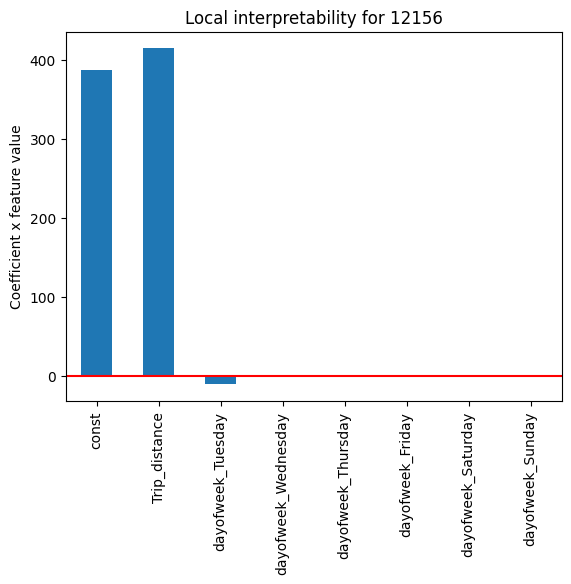

In [ ]:
effect.plot.bar()

plt.axhline(y=0, color='r', linestyle='-')
plt.ylabel("Coefficient x feature value")
plt.title(f"Local interpretability for {obs}")
plt.show()

* `Trip_distance` by far has the largest effect on the target variable

Text(0, 0.5, 'Effects (coeff x feature)')

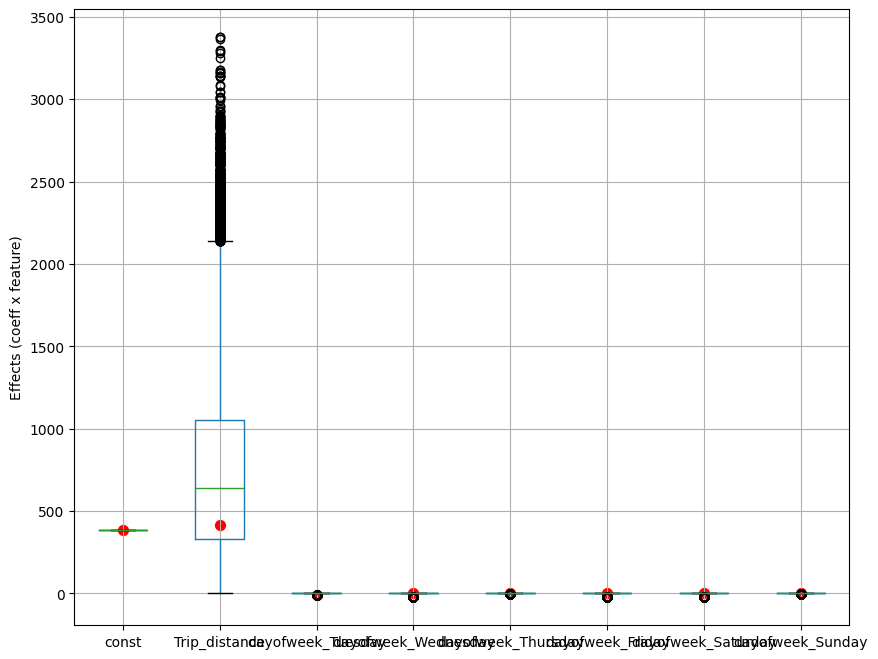

In [ ]:
# overlay the individual observation to the effects

effects.boxplot(figsize=(10,8), positions=range(len(effects.columns)))
plt.scatter(effects.columns, effect,  marker='o', color="r", s=50)
plt.ylabel("Effects (coeff x feature)")

The observation in question with a `Trip_distance` of ~7K has an effect which is in the 25-50 percentile of the effects across all observations

---

# Feature Selection with Lasso Regularization

Code Example Found Here: https://colab.research.google.com/drive/1ygbq5vsDnU07pK6gvVlrkTAT0BLuCJ_E